In [410]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords

from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D,Conv1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

In [2]:
corpus = [
    # Positive Reviews

    'This is an excellent movie',
    'The move was fantastic I like it',
    'You should watch it is brilliant',
    'Exceptionally good',
    'Wonderfully directed and executed I like it',
    'Its a fantastic series',
    'Never watched such a brillent movie',
    'It is a Wonderful movie',

    # Negtive Reviews

    "horrible acting",
    'waste of money',
    'pathetic picture',
    'It was very boring',
    'I did not like the movie',
    'The movie was horrible',
    'I will not recommend',
    'The acting is pathetic'
]

In [411]:
import pandas as pd
text = pd.read_csv('chennai_reviews.csv')
text.head()

,Hotel_name,Review_Title,Review_Text,Sentiment,Rating_Percentage,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Accord Metropolitan,Excellent comfortableness during stay,Its really nice place to stay especially for b...,3,100,NaN,NaN,NaN,NaN
1,Accord Metropolitan,Not too comfortable,It seems that hotel does not check the basic a...,1,20,NaN,NaN,NaN,NaN
2,Accord Metropolitan,NaN,Worst hotel I have ever encountered. I will ne...,1,20,NaN,NaN,NaN,NaN
3,Accord Metropolitan,Best hotel,Had a good time in this hotel and the staff Ku...,3,100,NaN,NaN,NaN,NaN
4,Accord Metropolitan,NaN,good hotel and staff Veg food good non veg bre...,3,100,NaN,NaN,NaN,NaN


In [412]:
text_data = text.loc[:,['Review_Text','Sentiment']] 

In [413]:
text_data1 = text_data[text_data['Sentiment']=='1']
text_data2 = text_data[text_data['Sentiment']=='2']
text_data3 = text_data[text_data['Sentiment']=='3']

In [414]:
text_data =  pd.concat([text_data1,text_data2,text_data3])

In [415]:
text_data.head()

,Review_Text,Sentiment
1,It seems that hotel does not check the basic a...,1
2,Worst hotel I have ever encountered. I will ne...,1
38,"Check in took more then 45 mins, all the 4 pil...",1
41,"This property is a bit old. Bath tub, toilets ...",1
42,The hotel rooms are quite old and are not main...,1


In [416]:
for i in range(len(text_data)):
    if text_data.iloc[i].Sentiment=='2':
        text_data.iloc[i].Sentiment='1'

In [417]:
for i in range(len(text_data)):
    if text_data.iloc[i].Sentiment == '3':
        text_data.iloc[i].Sentiment = 1
    else:
        text_data.iloc[i].Sentiment = 0

In [418]:
import re
for i in range(len(text_data)):
    x = text_data.iloc[i].Review_Text
    x = re.sub(r'https:\/\/[a-zA-Z]*\.com',' ',x)
    x = re.sub(r'\W+',' ',x)
    x = re.sub(r'\d+',' ',x)
    x = re.sub(r'^\s+','',x)
    x = re.sub(r'\s+$','',x)
    x = re.sub(r'\s+',' ',x)
    x = x.lower()
    text_data.iloc[i].Review_Text = x

In [419]:
import nltk
from nltk.corpus import stopwords

In [420]:
from nltk.tokenize import word_tokenize

In [421]:
for i in range(len(text_data)):
    x = text_data.iloc[i].Review_Text
    x = word_tokenize(x)
    new_x_list = [word for word in x if word not in stopwords.words('english')]
    text_data.iloc[i].Review_Text = ' '.join(new_x_list)
    if i%100==0:
        print(i,end=" ")

0 100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600 2700 2800 2900 3000 3100 3200 3300 3400 3500 3600 3700 3800 3900 4000 4100 4200 4300 4400 4500 4600 4700 

In [422]:
text_data.iloc[4].Review_Text

'hotel rooms quite old maintained chair cushion torn shower curtains window curtains even phone musty smell wait reception long breakfast decent location good us visa applicants'

In [61]:
sentiments = array([1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0])

In [423]:
X_train, X_test, y_train, y_test = train_test_split(text_data.Review_Text, text_data.Sentiment, test_size=0.20)

In [424]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_data.Review_Text)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [425]:
vocab_size = len(tokenizer.word_index) + 1

maxlen = 324

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [426]:
word_index = tokenizer.word_index
embedding_dim = 300
max_length = 324

In [427]:
import gensim
WORD2VEC_MODEL = "dataset\model_1_lac.bin"
#load word2vec model
word2vec = gensim.models.KeyedVectors.load_word2vec_format(WORD2VEC_MODEL, binary=True, limit=100000)

C:\ProgramData\Anaconda3\lib\site-packages\smart_open\smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [428]:
embedding_weights = np.zeros((vocab_size, embedding_dim))
for word, index in tokenizer.word_index.items():
    #embedding_vector = word2vec.get(word)
    try:
        embedding_weights[index,:] = word2vec[word]
    except:
        pass 

In [429]:
print(word2vec['not'])

[ 0.08496094 -0.09521484  0.11914062  0.11181641 -0.11132812  0.04980469
  0.11425781 -0.09863281  0.09960938 -0.04150391  0.01287842 -0.18164062
 -0.11621094  0.02380371 -0.1640625   0.12695312  0.12060547  0.00946045
  0.04150391 -0.09521484 -0.12988281 -0.11523438  0.07519531 -0.04980469
  0.06591797 -0.02905273 -0.08984375  0.08447266 -0.04785156 -0.02709961
 -0.10302734  0.11083984  0.01422119 -0.09863281  0.04125977  0.07226562
  0.10986328  0.01135254 -0.01483154  0.0456543   0.140625    0.14648438
  0.25976562 -0.16796875 -0.00145721 -0.02148438  0.0189209   0.04003906
  0.0559082   0.03808594  0.00202942  0.07128906 -0.05249023 -0.02783203
  0.11132812  0.11914062 -0.05249023 -0.07910156  0.10302734 -0.11816406
  0.03662109  0.13671875 -0.09033203 -0.0703125  -0.0390625  -0.01745605
 -0.08154297  0.2421875  -0.18066406  0.09570312  0.09033203  0.19921875
  0.04736328 -0.05517578 -0.22265625 -0.07421875  0.16113281  0.10400391
  0.11376953  0.11279297  0.00497437 -0.05102539  0

# Neural Network

In [457]:
model = Sequential()
embedding_layer = Embedding(vocab_size, 300, weights=[embedding_weights], input_length=maxlen , trainable=False)
model.add(embedding_layer)

model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [458]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_27 (Embedding)     (None, 324, 300)          1774200   
_________________________________________________________________
flatten_7 (Flatten)          (None, 97200)             0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 97201     
Total params: 1,871,401
Trainable params: 97,201
Non-trainable params: 1,774,200
_________________________________________________________________
None


In [459]:
history = model.fit(X_train, y_train,  epochs=15, verbose=1,validation_split=0.2)

Train on 3009 samples, validate on 753 samples
Epoch 1/15
3009/3009 [==============================] - 2s 687us/step - loss: 0.5146 - acc: 0.7394 - val_loss: 0.4545 - val_acc: 0.8035
Epoch 2/15
3009/3009 [==============================] - 1s 435us/step - loss: 0.3858 - acc: 0.8471 - val_loss: 0.4217 - val_acc: 0.8167
Epoch 3/15
3009/3009 [==============================] - 1s 429us/step - loss: 0.3312 - acc: 0.8777 - val_loss: 0.4015 - val_acc: 0.8274
Epoch 4/15
3009/3009 [==============================] - 1s 429us/step - loss: 0.2911 - acc: 0.9036 - val_loss: 0.3897 - val_acc: 0.8300
Epoch 5/15
3009/3009 [==============================] - 1s 431us/step - loss: 0.2606 - acc: 0.9163 - val_loss: 0.3816 - val_acc: 0.8287
Epoch 6/15
3009/3009 [==============================] - 1s 429us/step - loss: 0.2369 - acc: 0.9242 - val_loss: 0.3770 - val_acc: 0.8393
Epoch 7/15
3009/3009 [==============================] - 1s 434us/step - loss: 0.2206 - acc: 0.9335 - val_loss: 0.3773 - val_acc: 0.8446
E

In [460]:
score = model.evaluate(X_test, y_test, verbose=1)

941/941 [==============================] - 0s 288us/step


In [461]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.390925282713394
Test Accuracy: 0.8501594048884166


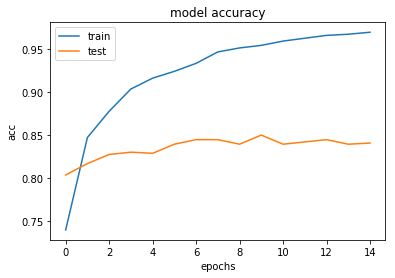

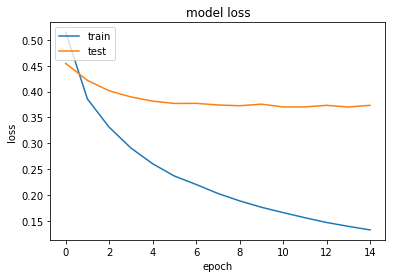

In [462]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [260]:
pre = ['very bad']
pre_sequences = tokenizer.texts_to_sequences(pre)
pre_padded = pad_sequences(pre_sequences,maxlen=max_length, truncating='post')
prediction = model.predict(pre_padded)
prediction

array([[0.5234431]], dtype=float32)

In [499]:
model = Sequential()

embedding_layer = Embedding(vocab_size, 300, weights=[embedding_weights], input_length=maxlen , trainable=False)
model.add(embedding_layer)

model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [500]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_28 (Embedding)     (None, 324, 300)          1774200   
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 320, 128)          192128    
_________________________________________________________________
global_max_pooling1d_8 (Glob (None, 128)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 129       
Total params: 1,966,457
Trainable params: 192,257
Non-trainable params: 1,774,200
_________________________________________________________________
None


In [501]:
history = model.fit(X_train, y_train, batch_size = 128, epochs=6, verbose=1, validation_split=0.2)

score = model.evaluate(X_test, y_test, verbose=1)

Train on 3009 samples, validate on 753 samples
Epoch 1/6
3009/3009 [==============================] - 42s 14ms/step - loss: 0.5286 - acc: 0.7315 - val_loss: 0.4348 - val_acc: 0.7995
Epoch 2/6
3009/3009 [==============================] - 41s 14ms/step - loss: 0.3793 - acc: 0.8481 - val_loss: 0.3796 - val_acc: 0.8486
Epoch 3/6
3009/3009 [==============================] - 41s 14ms/step - loss: 0.3148 - acc: 0.8833 - val_loss: 0.3571 - val_acc: 0.8526
Epoch 4/6
3009/3009 [==============================] - 41s 14ms/step - loss: 0.2654 - acc: 0.9133 - val_loss: 0.3333 - val_acc: 0.8685
Epoch 5/6
3009/3009 [==============================] - 41s 14ms/step - loss: 0.2225 - acc: 0.9299 - val_loss: 0.3205 - val_acc: 0.8712
Epoch 6/6
941/941 [==============================] - 6s 6ms/step


In [506]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.32427524046044043
Test Accuracy: 0.8618490967689741


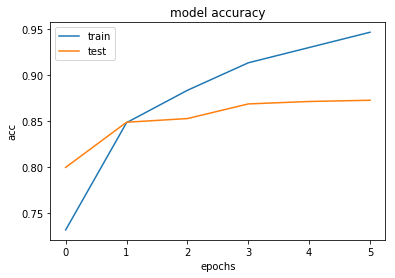

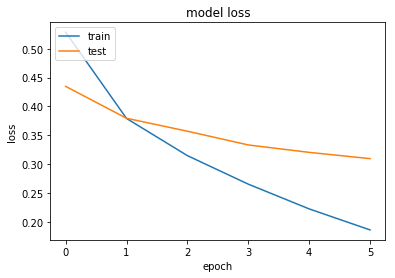

In [503]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [513]:
pre = ['the location is very nice']
pre_sequences = tokenizer.texts_to_sequences(pre)
print(pre_sequences)
pre_padded = pad_sequences(pre_sequences,maxlen=max_length, padding='post')
prediction = model.predict(pre_padded)
prediction

[[9, 10]]


array([[0.96134114]], dtype=float32)